In [10]:
x <- seq(5,54)
e <- x*rnorm(length(x), 0, 1)
y <- 10 + 2*x+e 

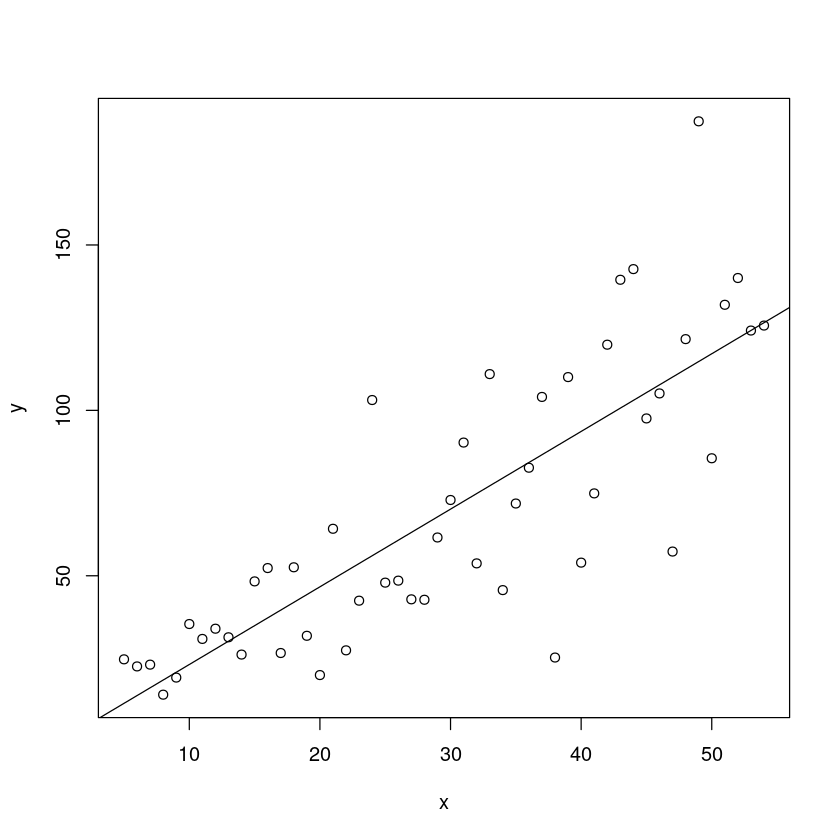

In [11]:
plot(x,y)
abline(lm(y~x))

In [12]:
summary(lm(y~x))


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.653 -12.402  -0.452  13.357  72.604 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.3004     7.9952  -0.038     0.97    
x             2.3483     0.2435   9.646 8.14e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.84 on 48 degrees of freedom
Multiple R-squared:  0.6597,	Adjusted R-squared:  0.6526 
F-statistic: 93.04 on 1 and 48 DF,  p-value: 8.137e-13


In [14]:
summary(lm(y~x, weights=1/x))


Call:
lm(formula = y ~ x, weights = 1/x)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-10.0667  -2.9841   0.2907   2.9125  10.8956 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.2438     4.7792   1.097    0.278    
x             2.1604     0.1964  10.998 1.03e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.267 on 48 degrees of freedom
Multiple R-squared:  0.7159,	Adjusted R-squared:   0.71 
F-statistic: 120.9 on 1 and 48 DF,  p-value: 1.028e-14


In [15]:
library('sandwich')

In [16]:
m1 <- lm(y~x)

In [18]:
vcovHC(m1, type='HC0')
vcovHC(m1, type='HC1')
vcovHC(m1, type='HC2')
vcovHC(m1, type='HC3')

(Intercept) x          
(Intercept) 26.7373875  -0.99502447
x           -0.9950245   0.05035169

(Intercept) x          
(Intercept) 27.851445   -1.03648383
x           -1.036484    0.05244967

(Intercept) x          
(Intercept) 28.038551   -1.04809426
x           -1.048094    0.05299115

(Intercept) x          
(Intercept) 29.41207    -1.10421000
x           -1.10421     0.05577853

In [22]:
library('lmtest')

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [23]:
coeftest(m1, vcov. = vcovHC(m1, type='HC1'))


t test of coefficients:

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -0.30042    5.27745 -0.0569    0.9548    
x            2.34834    0.22902 10.2539 1.107e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [24]:
coeftest(m1, vcov. = vcovHC(m1, type='HC3'))


t test of coefficients:

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -0.30042    5.42329 -0.0554    0.9561    
x            2.34834    0.23617  9.9432 3.051e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
